In [279]:
#Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [84]:
#Loading Dataframe
df = pd.read_csv('/Users/saarth2712/Downloads/crx.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [85]:
df.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [86]:
df = df.replace("?", np.nan)
df.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [87]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [88]:
#Fixing Data Types
df = df.astype({1 : 'float', 13: 'float'})
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

In [89]:
#Replacing NaN values in numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns 

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean()) 
    
df.isnull().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

In [90]:
#Fixing Categorical Columns
cat_col = df.select_dtypes('object').columns

for col in cat_col:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [91]:
col_names = {0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault',
9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14:'Income', 15: 'ApprovalStatus' }

df.rename(columns = col_names, inplace = True)

In [92]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [93]:
#Data Analysis

#Univariate Analysis
counts = df['ApprovalStatus'].value_counts()
total = counts.sum()
percentages = (counts / total) * 100

for status, count in counts.items():
    print(f"Category '{status}': {count} instances ({percentages[status]:.2f}%)")

Category '-': 383 instances (55.51%)
Category '+': 307 instances (44.49%)


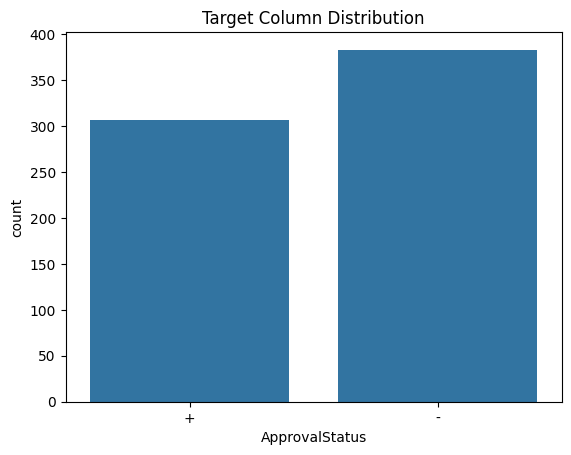

In [94]:
# Plot the distribution
sns.countplot(data=df, x='ApprovalStatus')
plt.title("Target Column Distribution")  
plt.show()

As we can see from the distribution, the imbalance is moderate

In [95]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


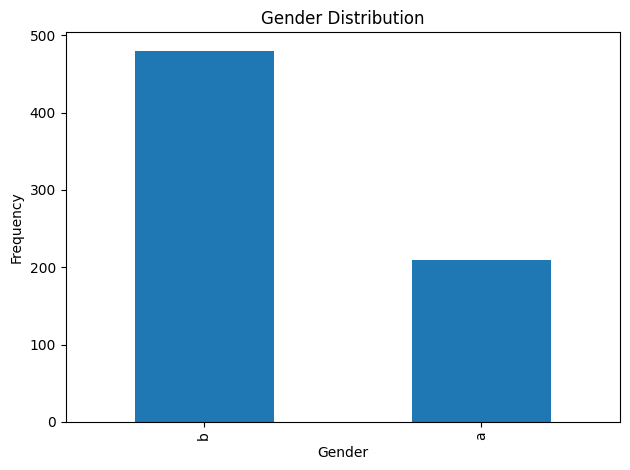

In [104]:
#Gender
df['Gender'].value_counts().plot(kind= 'bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

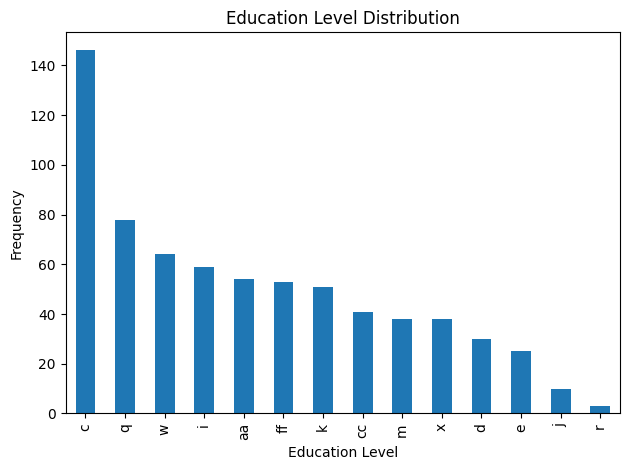

In [97]:
#EducationLevel
df['EducationLevel'].value_counts().plot(kind= 'bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

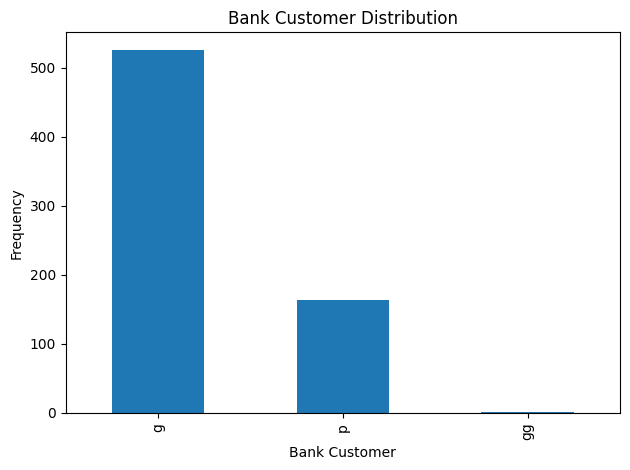

In [98]:
df['BankCustomer'].value_counts().plot(kind= 'bar')
plt.title('Bank Customer Distribution')
plt.xlabel('Bank Customer')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

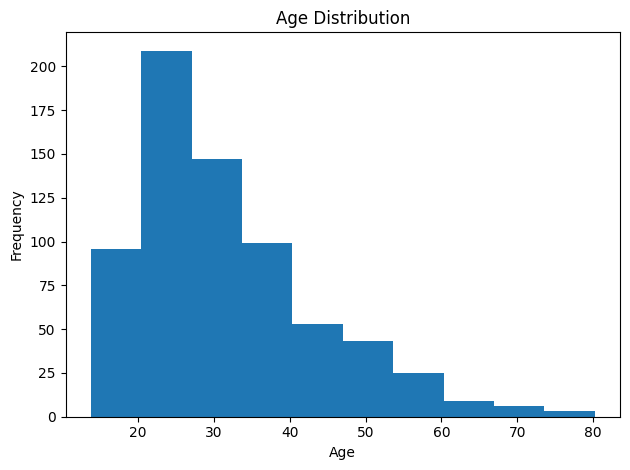

In [99]:
#Age
df['Age'].plot(kind= 'hist')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

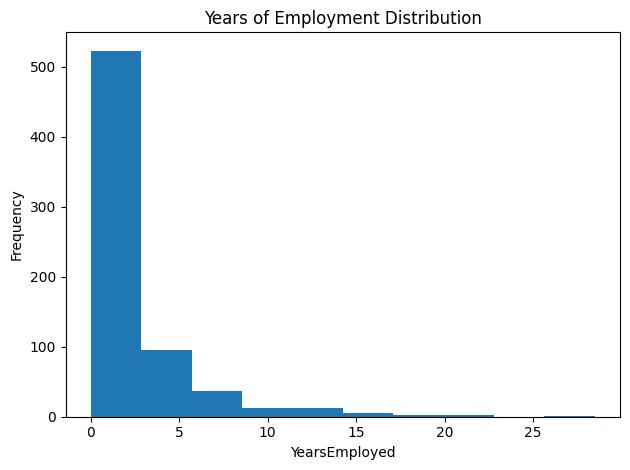

In [128]:
#YearsEmployed
df['YearsEmployed'].plot(kind= 'hist')
plt.title('Years of Employment Distribution')
plt.xlabel('YearsEmployed')
plt.ylabel('Frequency')
plt.tight_layout()


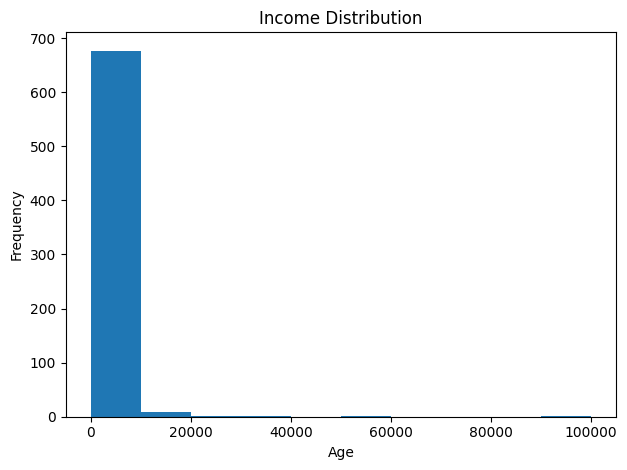

In [101]:
#Income
df['Income'].plot(kind= 'hist')
plt.title('Income Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [102]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


<Axes: xlabel='ApprovalStatus'>

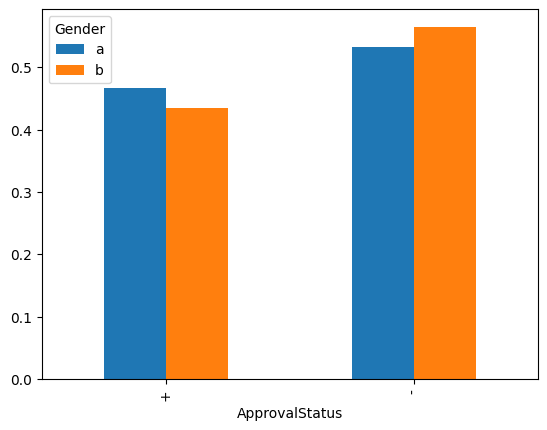

In [107]:
#BiVariate Analysis

#Gender & Approval Status
gender = pd.crosstab(df['ApprovalStatus'], df['Gender'])
gender.div(gender.sum().astype(float)).plot(kind='bar')


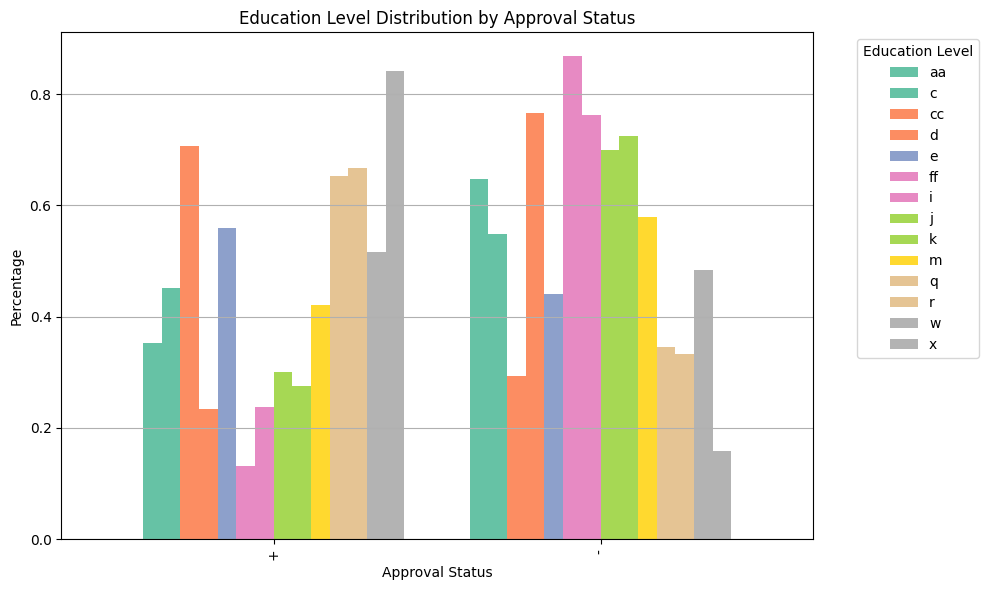

In [120]:
#Checking Education Level and Approval Status
edlevel = pd.crosstab(df['ApprovalStatus'], df['EducationLevel'])
edlevel_percentage = edlevel.div(edlevel.sum(0).astype(float), axis=1)

# Plot the data
ax = edlevel_percentage.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, colormap='Set2')
plt.title('Education Level Distribution by Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

(array([0, 1]), [Text(0, 0, '+'), Text(1, 0, '-')])

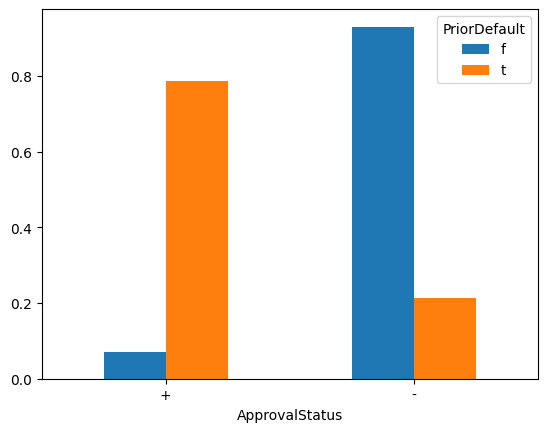

In [122]:
#Checking PriorDefault and ApprovalStatus
PriorDefault = pd.crosstab(df['ApprovalStatus'], df['PriorDefault'])
PriorDefault.div(PriorDefault.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)
plt.xticks(rotation= 0)

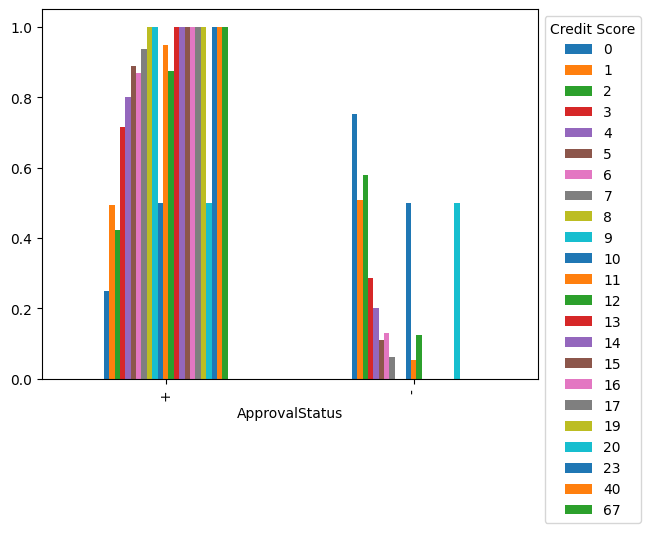

In [131]:
#Checking Credit Score and Approval Status
df['CreditScore']
CreditScore = pd.crosstab(df['ApprovalStatus'], df['CreditScore'])
CreditScore.div(CreditScore.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')


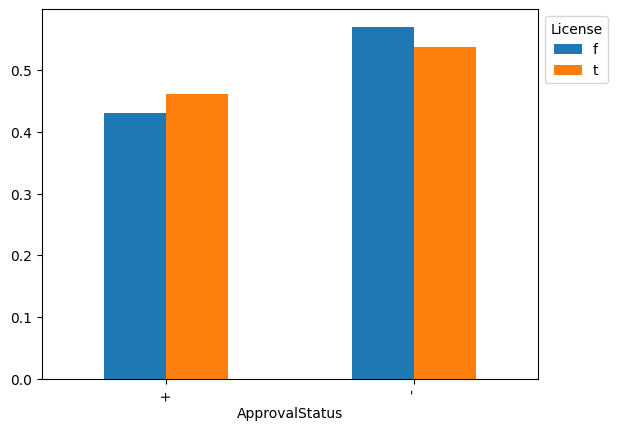

In [134]:
#Checking Drivers License and Approval Status
df['DriversLicense']
CreditScore = pd.crosstab(df['ApprovalStatus'], df['DriversLicense'])
CreditScore.div(CreditScore.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)
plt.legend(title='License', bbox_to_anchor=(1, 1), loc='upper left')

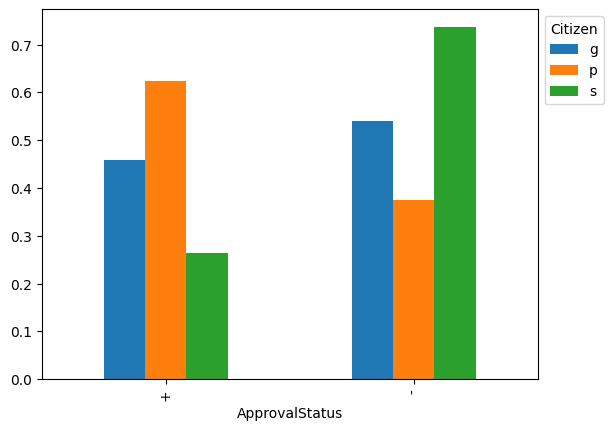

In [135]:
#Checking Citizenship and Approval Status
df['CreditScore']
CreditScore = pd.crosstab(df['ApprovalStatus'], df['Citizen'])
CreditScore.div(CreditScore.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)
plt.legend(title='Citizen', bbox_to_anchor=(1, 1), loc='upper left')

Age                 Axes(0.125,0.11;0.110714x0.77)
Debt             Axes(0.257857,0.11;0.110714x0.77)
YearsEmployed    Axes(0.390714,0.11;0.110714x0.77)
CreditScore      Axes(0.523571,0.11;0.110714x0.77)
ZipCode          Axes(0.656429,0.11;0.110714x0.77)
Income           Axes(0.789286,0.11;0.110714x0.77)
dtype: object

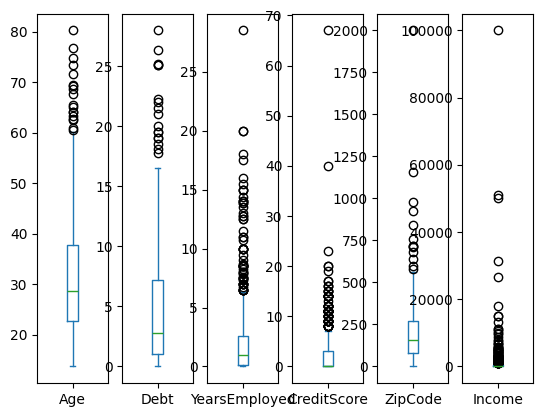

In [138]:
#Outliers
df.plot(kind= 'box', subplots= True)

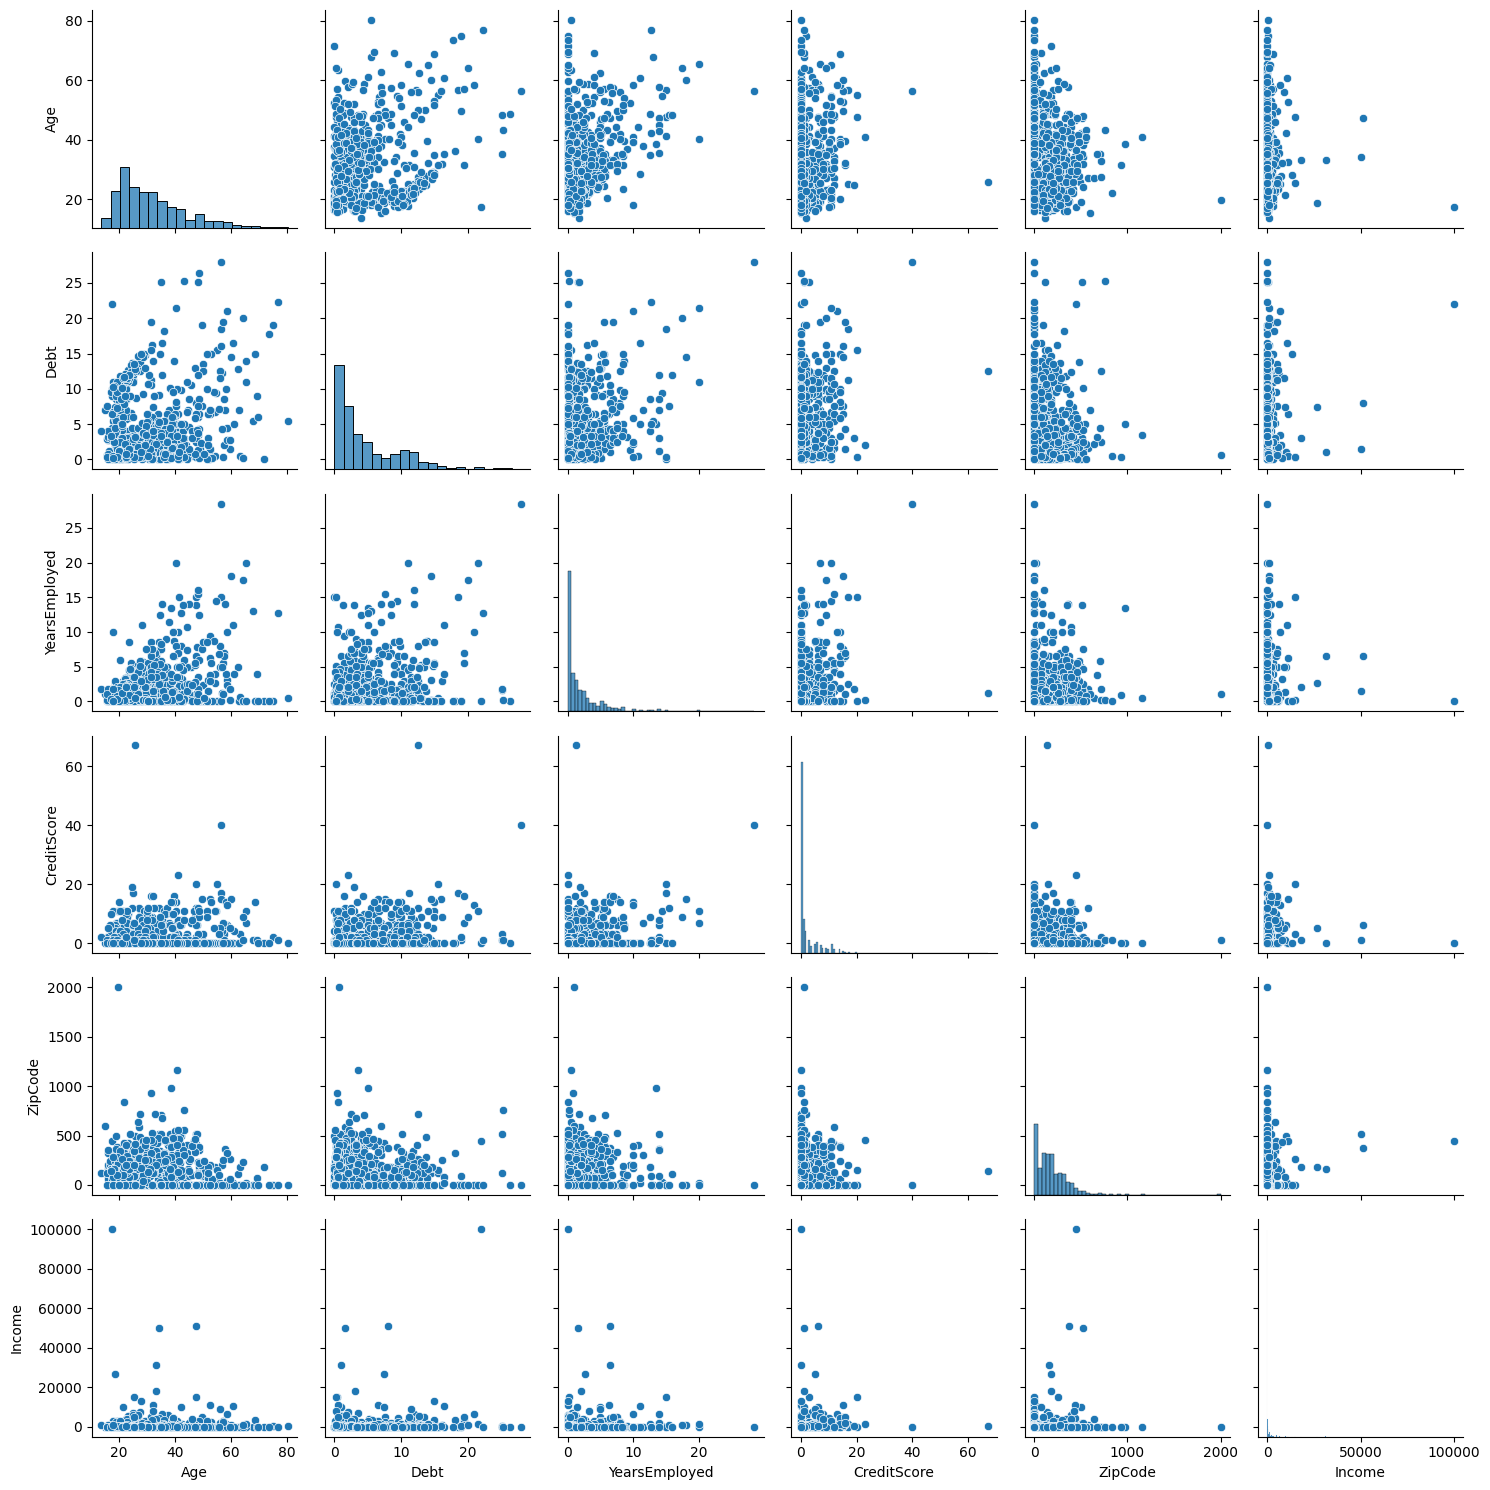

In [140]:
#Correlation
sns.pairplot(df)
plt.tight_layout()

In [144]:
#Data Preparation
def Encoder(df):
    to_encode = list(df.select_dtypes(include = ['category', 'object']))
    
    enc = LabelEncoder()
    
    for col in to_encode:
        try:
            df[col] = enc.fit_transform(df[col])
        except:
            print("Error while encoding " + col)
            
    return df

df = Encoder(df)

In [146]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


In [151]:
#Splitting Data
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

#Extra Trees Regression
Extreg_model = ExtraTreesRegressor()
Extreg_model.fit(X,Y)
Extreg_model.feature_importances_

array([0.01577989, 0.05222989, 0.05315249, 0.01535553, 0.00849355,
       0.05128984, 0.03173381, 0.04404007, 0.51898598, 0.05469186,
       0.01134602, 0.01782105, 0.02208218, 0.06654924, 0.03644861])

In [ ]:
#Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

#Scaling
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [161]:
#Logistic Regression
logreg = LogisticRegression(random_state=0)
logreg.fit(rescaled_X_train, y_train)

logregpred = logreg.predict(rescaled_X_test)


In [170]:
#Confusion Matrix
matrix = confusion_matrix(y_test, logregpred)
matrix

array([[86, 13],
       [14, 94]])

In [179]:
#Accuracy Score
accuracy = accuracy_score(y_test, logregpred)*100
print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 86.96%


In [180]:
#Recall Score
recall = recall_score(y_test, logregpred) * 100  
print(f"Recall Score: {recall:.2f}%")

Recall Score: 87.04%


In [181]:
#Precison Score
precision = precision_score(y_test, logregpred)*100
print(f"Precision Score: {recall:.2f}%")

Precision Score: 87.04%


In [236]:
#Model Tuning Using Grid Search
mod = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']  
random_state = [0]
dual = [False]  
class_weight = [None, 'balanced'] 

# Define grid search
param_grid = {
    'solver': solvers,
    'penalty': penalty,
    'class_weight': class_weight,
    'random_state': random_state,
    'dual': dual
}

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=5)

# Initialize and perform grid search
grid_search = GridSearchCV(estimator=mod, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(rescaled_X_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_:.6f} using {grid_result.best_params_}")

Best: 0.854613 using {'class_weight': 'balanced', 'dual': False, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [ ]:
#Testing GridSearch Model
logreg2 = LogisticRegression(class_weight= 'balanced' , dual = False, penalty= 'l2', random_state= 0, solver= 'liblinear')
logreg2.fit(rescaled_X_train, y_train)

logreg2pred = logreg2.predict(rescaled_X_test)

In [243]:
#Confusion Matrix
logreg2_matrix = confusion_matrix(y_test, logreg2pred)
logreg2_matrix

array([[88, 11],
       [15, 93]])

In [245]:
#Accuracy Score
accuracy = accuracy_score(y_test, logreg2pred)*100
print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 87.44%


In [246]:
#Recall Score
recall = recall_score(y_test, logreg2pred) * 100  
print(f"Recall Score: {recall:.2f}%")

Recall Score: 86.11%


In [247]:
#Precison Score
precision = precision_score(y_test, logreg2pred)*100
print(f"Precision Score: {recall:.2f}%")

Precision Score: 86.11%


<Axes: >

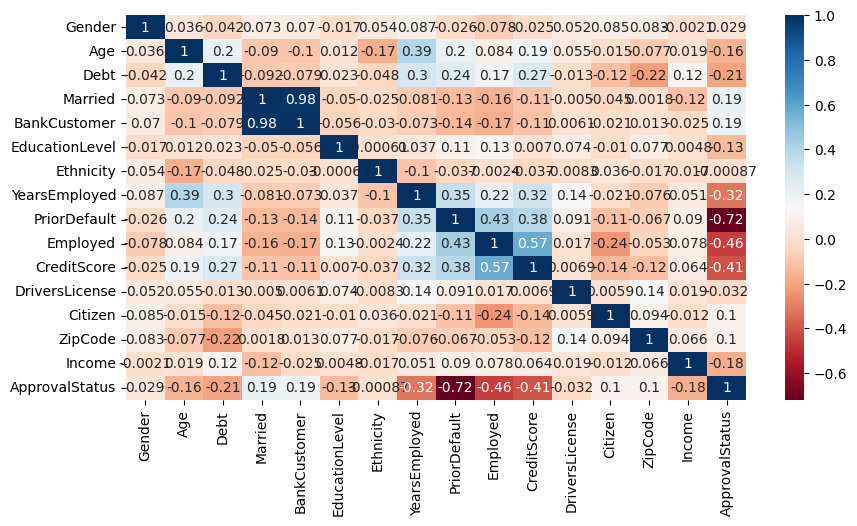

In [263]:
#Feature Selection

#Identifying Correlations
corrmat = df.corr()
features = corrmat.index
plt.figure(figsize=(10,5))
sns.heatmap(df[features].corr(), annot=True, cmap="RdBu")

In [264]:
#Selecting Columns
approvalStatus_corr = np.abs(corrmat['ApprovalStatus'])
mask = approvalStatus_corr >= 0.17
approvalStatus_corr = approvalStatus_corr[mask]
approvalStatus_corr.drop(index=['BankCustomer','Married','ApprovalStatus'], inplace=True)
approvalStatus_corr

Debt             0.206294
YearsEmployed    0.322475
PriorDefault     0.720407
Employed         0.458301
CreditScore      0.406410
Income           0.175657
Name: ApprovalStatus, dtype: float64

In [267]:
features = approvalStatus_corr.index
X = df[features]
y = df['ApprovalStatus']

#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [ ]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [ ]:
#Running Regression
logreg3 = LogisticRegression(random_state=0)
logreg3.fit(rescaled_X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting Values
logreg3pred = logreg3.predict(rescaled_X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0])

In [272]:
#Confusion Matrix
matrix = confusion_matrix(y_test, logregpred)
matrix

array([[86, 13],
       [14, 94]])

In [278]:
#Accuracy Score
accuracy = accuracy_score(y_test, logreg3pred)*100
print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 86.96%


In [277]:
#Recall Score
recall = recall_score(y_test, logreg3pred)*100
print(f"Recall Score: {recall:.2f}%")

Recall Score: 83.33%


In [276]:
#Precision Score
precision = precision_score(y_test, logreg3pred)*100
print(f"Precision Score: {precision:.2f}%")

Precision Score: 90.91%
